# Elastic Search - Flask 

#### Youhan Pan

### Flask & Elastic Search Preparation

In [1]:
pip install Flask

Note: you may need to restart the kernel to use updated packages.


In [2]:
from flask import request
from flask import Flask, render_template

In [3]:
# Connet to elasticsearch
from elasticsearch import Elasticsearch
client = Elasticsearch("http://localhost:9200") 

from elasticsearch_dsl import connections
client = connections.create_connection("http://localhost:9200")

# Import dataset to elasticsearch
from elasticsearch import helpers, Elasticsearch
import pandas as pd
import json

df = pd.read_csv('/Users/youhanpan/Desktop/Movie Project/TMDb_final.csv')
json_str = df.to_json(orient='records')

json_records = json.loads(json_str)

es = Elasticsearch()
index_name = 'title'
doctype = 'movie_record'
es.indices.delete(index=index_name, ignore=[400, 404])
es.indices.create(index=index_name, ignore=400)
action_list = []
for row in json_records:
    record ={
        '_op_type': 'index',
        '_index': index_name,
        '_type' : doctype,
        '_source': row
    }
    action_list.append(record)
helpers.bulk(es, action_list)

from elasticsearch_dsl import Search
from pprint import pprint 

/Users/youhanpan/opt/anaconda3/lib/python3.9/site-packages/elasticsearch/connection/base.py:200: ElasticsearchWarning: [types removal] Specifying types in bulk requests is deprecated.
  warnings.warn(message, category=ElasticsearchWarning)


### Movie Votes & Rating

In [ ]:
app = Flask("APAN5400App")

@app.route('/')
def my_form():
    return render_template("my-form.html")

@app.route('/', methods=['POST'])
def my_form_post():
    qry = request.form['userinput']

#    qry 输出 Movie Name

    # vote_average and vote_count result of The Godfather

    s = Search(using=client, index="title") \
        .query("match", title=qry)
    response = s.execute()
    
    len(response)
    
    dd = list(response)
    
    ff = {}
    
    ff["vote_average"] = dd[1]['vote_average']
    
    return ff


app.run(host='localhost', port=5020)

 * Serving Flask app "APAN5400App" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://localhost:5020/ (Press CTRL+C to quit)
127.0.0.1 - - [20/Aug/2022 23:24:08] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [20/Aug/2022 23:24:10] "POST / HTTP/1.1" 200 -


### Elastic Search Analysis Introduction

I first converted the New York Times's API to JSON, tried to calculate the number of "critics top picks" to make a list of popular movies from 1970s to 2020s, and then picked the top 3 movies to evaluate professional film critics' reviews on them. Hence, I can create a model to recommend movies with the most positive reviews to potential American streaming platforms. Unfortunately, this NYT plan did not work out due to the limited outsources provided (e.g. "Pulp Fiction" and "The Shawshank Redemption" only have one critic review available). To make my analysis more accurate, I researched for more useful and meaningful datasets from Kaggle. 

In this analysis, I will select the Top 3 rated and voted movies from recently updated TMDb dataset and further research these films' critics and the sentiment of their reviews on Rotten Tomatoes, which is an American review-aggregation website for film and television. Eventually, this model could test out any film's sentimental feedbacks (positive, negative, or neutral) from regular audiences. 

### Elasticsearch Preparation

To make the elasticsearch process easier, I coverted CSV file into JSON.

In [3]:
# Connet to elasticsearch
from elasticsearch import Elasticsearch
client = Elasticsearch("http://localhost:9200") 

from elasticsearch_dsl import connections
client = connections.create_connection("http://localhost:9200")

In [10]:
# Import dataset to elasticsearch
from elasticsearch import helpers, Elasticsearch
import pandas as pd
import json

df = pd.read_csv('/Users/youhanpan/Desktop/Movie Project/TMDb_final.csv')
json_str = df.to_json(orient='records')

json_records = json.loads(json_str)

es = Elasticsearch()
index_name = 'title'
doctype = 'movie_record'
es.indices.delete(index=index_name, ignore=[400, 404])
es.indices.create(index=index_name, ignore=400)
action_list = []
for row in json_records:
    record ={
        '_op_type': 'index',
        '_index': index_name,
        '_type' : doctype,
        '_source': row
    }
    action_list.append(record)
helpers.bulk(es, action_list)

(10000, [])

In [11]:
from elasticsearch_dsl import Search
from pprint import pprint 

### Top Votes & Rates Movies

I have tried Multisearch to list the top 10 films with both highest votes (vote_count) and rates (vote_average). However, I ended up with 20 results of both sections' top 10. To solve this problem, I first printed more highly voted or viewed films and then compared their reviews' ratings to select the finalists. The reason why of doing selection based on both factors is because films with tons of votes do not often have a high rating score while one full score (10 out of 10) can give a film a supper high rating average. To fairly pick and choose top popular or classic movies, I would like to combine both elements in consideration. 

In [22]:
# Top 30 in vote counts 

s = Search(using=client, index="title") \
    .sort({'vote_count': {'order': 'desc'}}) \
    .extra(size = 30)
response = s.execute()

for hit in response:
    print(hit.title, hit.vote_count)

Inception 25148
Deadpool 22225
The Avengers 21893
Interstellar 21589
The Dark Knight 21561
Avatar 20778
Guardians of the Galaxy 20132
Fight Club 18664
Pulp Fiction 18003
Django Unchained 17864
Iron Man 17828
Avengers: Infinity War 17408
Forrest Gump 17344
The Matrix 16481
The Lord of the Rings: The Fellowship of the Ring 16434
Titanic 16434
Harry Potter and the Philosopher's Stone 16220
The Hunger Games 16015
Mad Max: Fury Road 15987
Iron Man 3 15780
Captain America: Civil War 15755
The Dark Knight Rises 15616
The Shawshank Redemption 15522
Avengers: Age of Ultron 15376
Jurassic World 15292
Suicide Squad 15125
The Lord of the Rings: The Return of the King 14987
Shutter Island 14891
Black Panther 14662
The Wolf of Wall Street 14617


In [18]:
# Top 30 in vote average rating  

s = Search(using=client, index="title") \
    .sort({'vote_average': {'order': 'desc'}}) \
    .extra(size = 30)
response = s.execute()

for hit in response:
    print(hit.title, hit.vote_average)

Mamu (and a Mother Too) 10.0
Four Kids and It 10.0
The Water Monster 10.0
Prostitution 10.0
You're Bacon Me Crazy 10.0
Gully 10.0
Erotica:  Moonlight 9.8
Bulletproof 2 9.5
Bad Education 9.5
Kinky Boots: The Musical 9.2
Sub Rosa 9.0
Ordinary Love 9.0
And What Is He Like? 9.0
Tisay 9.0
Dilwale Dulhania Le Jayenge 8.8
Steven Universe: The Movie 8.8
The Seven Swords 8.8
Mother's Friend 8.8
Lemonade 8.8
The Shawshank Redemption 8.7
The Godfather 8.7
Away 8.7
Season of Love 8.7
Live at Wembley Stadium 8.7
Love Takes Flight 8.7
Pink Floyd: Pulse 8.7
Schindler's List 8.6
KonoSuba: God's Blessing on this Wonderful World! Legend of Crimson 8.6
For Sama 8.6
One Love Manchester 8.6


In [58]:
# vote_average and vote_count result of The Shawshank Redemption

s = Search(using=client, index="title") \
    .query("match", title="Shawshank")
response = s.execute()

for hit in response:
        print(hit.title, hit.vote_average, hit.vote_count)

The Shawshank Redemption 8.7 15522


In [51]:
# vote_average and vote_count result of The Godfather

s = Search(using=client, index="title") \
    .query("match", title="godfather")
response = s.execute()

for hit in response:
    print(hit.title, hit.vote_average, hit.vote_count)

The Godfather 8.7 11768
Our Godfather 6.6 28
The Godfather: Part II 8.5 6917
The Godfather: Part III 7.4 3461


In [59]:
# vote_average and vote_count result of Pulp Fiction

s = Search(using=client, index="title") \
    .query("match", title="pulp")
response = s.execute()

for hit in response:
        print(hit.title, hit.vote_average, hit.vote_count)

Pulp Fiction 8.5 18003


Due to the previous counting results, I have chosen the following three movies (The Godfather; The Shawshank Redemption; Pulp Fiction) to be the Top 3 classics for further research. 

                                    Rating       Votes
    (1)The Shawshank Redemption     8.7          15522
    (2)The Godfather                8.7          11768
    (3)Pulp Fiction                 8.5          18003

### Movie Reviews

Both datasets are downloaded as CSV files. Since both datasets are relatively dependent on its "rotten_tomatoes_link" column to identify each film, I combined both movie and review files based on films' individual links. The most significant elements that I need here are "movie_title" with its "top_critic" and "review_content". 

My assumption of the top films' order is presented above; however, I want to double-check and prove this order with the picks from the top critics. Furthermore, I want to know whether the most popular movies often get the most attention from critics as well. Working with the "top_critic" column, I simply print the number of 'False' and 'True' and calculate each film's frequency (percentage) of hitting the top critic.

In [72]:
# Import Rotten Tomatoes movies and critic reviews dataset
df1 = pd.read_csv('/Users/youhanpan/Desktop/Movie Project/rotten_tomatoes_critic_reviews.csv')
df2 = pd.read_csv('/Users/youhanpan/Desktop/Movie Project/rotten_tomatoes_movies.csv')

# Merge movie info with movie reviews, and only keep movie_title, top_critic, review_content columns
review = pd.merge(df2, df1, how = 'left', on = 'rotten_tomatoes_link')
review = review[['movie_title', 'top_critic', 'review_content']]

# Preview review table
review.head(10)

,movie_title,top_critic,review_content
0,Percy Jackson & the Olympians: The Lightning T...,False,A fantasy adventure that fuses Greek mythology...
1,Percy Jackson & the Olympians: The Lightning T...,False,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,Percy Jackson & the Olympians: The Lightning T...,False,With a top-notch cast and dazzling special eff...
3,Percy Jackson & the Olympians: The Lightning T...,False,Whether audiences will get behind The Lightnin...
4,Percy Jackson & the Olympians: The Lightning T...,True,What's really lacking in The Lightning Thief i...
5,Percy Jackson & the Olympians: The Lightning T...,True,It's more a list of ingredients than a movie-m...
6,Percy Jackson & the Olympians: The Lightning T...,False,Harry Potter knockoffs don't come more transpa...
7,Percy Jackson & the Olympians: The Lightning T...,True,"Percy Jackson isn't a great movie, but it's a ..."
8,Percy Jackson & the Olympians: The Lightning T...,False,"Fun, brisk and imaginative"
9,Percy Jackson & the Olympians: The Lightning T...,True,"Crammed with dragons, set-destroying fights an..."


In [95]:
# Extract review of The Shawshank Redemption
shawshank = review[review['movie_title'] == "The Shawshank Redemption"]
shawshank.groupby(['top_critic'])['review_content'].count()

top_critic
False    100
True      38
Name: review_content, dtype: int64

In [94]:
# Extract review of The Godfather
godfather = review[review['movie_title'] == "The Godfather"]
godfather.groupby(['top_critic'])['review_content'].count()

top_critic
False    68
True     23
Name: review_content, dtype: int64

In [96]:
# Extract review of Pulp Fiction
pulp = review[review['movie_title'] == "Pulp Fiction"]
pulp.groupby(['top_critic'])['review_content'].count()

top_critic
False    148
True      64
Name: review_content, dtype: int64

    Extract Review Results
                                    Total       Top Critic (%)
    (1)Pulp Fiction                 212         30.19%
    (2)The Shawshank Redemption     138         27.53%
    (3)The Godfather                91          25.27%

Surprisingly, Pulp Fiction's reviews have the highest possibility of getting Top Critic over the other two that are considered to be more popular. Meanwhile, I also discovered an interesting trend. When it comes to movies like Pulp Fiction, the tastes of the viewers tend to be largely polarized. There is a group of people that madly loves these movies. There is another group that hates these movies completely. Therefore, conflicting opinions can cause a downward pull in ratings all the time. To further test out my discovered trend, I decided to do sentiment analysis on these critics' reviews.  

### Sentiment Analysis on Reviews

Categorizing the comments into "Positive, Neutral, and Negative", I will continue evaluating Top three movies' reviewers' points of views, and show my work with data visualization in pie charts. 

In [100]:
# Sentiment Analysis Preparation
import nltk
from nltk.corpus import movie_reviews
import random
import re

In [103]:
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review_content column
godfather['Cleaned Reviews'] = godfather['review_content'].apply(clean)
shawshank['Cleaned Reviews'] = shawshank['review_content'].apply(clean)
pulp['Cleaned Reviews'] = pulp['review_content'].apply(clean)

/var/folders/yk/knvjxvn50c1gh3cqkf73vnlc0000gn/T/ipykernel_96369/404978157.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  godfather['Cleaned Reviews'] = godfather['review_content'].apply(clean)
/var/folders/yk/knvjxvn50c1gh3cqkf73vnlc0000gn/T/ipykernel_96369/404978157.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shawshank['Cleaned Reviews'] = shawshank['review_content'].apply(clean)
/var/folders/yk/knvjxvn50c1gh3cqkf73vnlc0000gn/T/ipykernel_96369/404978157.py:10: SettingWithCopyWarning: 
A value

In [108]:
# Tokenization, POS tagging and Stopwords removal of review_content
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet


# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

# Apply POS tagging function to review_content
godfather['POS tagged'] = godfather['Cleaned Reviews'].apply(token_stop_pos)
shawshank['POS tagged'] = shawshank['Cleaned Reviews'].apply(token_stop_pos)
pulp['POS tagged'] = pulp['Cleaned Reviews'].apply(token_stop_pos)


[nltk_data] Downloading package punkt to /Users/youhanpan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/youhanpan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/youhanpan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/youhanpan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/var/folders/yk/knvjxvn50c1gh3cqkf73vnlc0000gn/T/ipykernel_96369/2231246141.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  godfather['POS tag

In [113]:
# Obtaining the stem words - Lemmatization 
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

# Apply Lemmatization function to review_content 
godfather['Lemma'] = godfather['POS tagged'].apply(lemmatize)
shawshank['Lemma'] = shawshank['POS tagged'].apply(lemmatize)
pulp['Lemma'] = pulp['POS tagged'].apply(lemmatize)

/var/folders/yk/knvjxvn50c1gh3cqkf73vnlc0000gn/T/ipykernel_96369/4053716268.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  godfather['Lemma'] = godfather['POS tagged'].apply(lemmatize)
/var/folders/yk/knvjxvn50c1gh3cqkf73vnlc0000gn/T/ipykernel_96369/4053716268.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shawshank['Lemma'] = shawshank['POS tagged'].apply(lemmatize)
/var/folders/yk/knvjxvn50c1gh3cqkf73vnlc0000gn/T/ipykernel_96369/4053716268.py:16: SettingWithCopyWarning: 
A value is trying to b

In [124]:
# Building sentiment analysis using TextBlob

# pip install TextBlob
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [126]:
# sentiment analaysis result of The Shawshank Redemption
fin_shawshank = pd.DataFrame(shawshank[['review_content', 'Lemma']])
fin_shawshank['Polarity'] = fin_shawshank['Lemma'].apply(getPolarity) 
fin_shawshank['Analysis'] = fin_shawshank['Polarity'].apply(analysis)
fin_shawshank.head()

,review_content,Lemma,Polarity,Analysis
793725,"With his gift for rapt pauses, for caressing j...",gift rapt pause caress right syllable Freema...,0.228571,Positive
793726,"With his gift for rapt pauses, for caressing j...",gift rapt pause caress right syllable Freema...,0.228571,Positive
793727,Shawshank is what might be described as an eth...,Shawshank might describe ethereal prison pic...,0.000000,Neutral
793728,It is able to sustain itself throughout its du...,able sustain throughout duration keep enrapt...,0.625000,Positive
793729,This is a film with excellent production value...,film excellent production value almost witho...,1.000000,Positive


In [125]:
# sentiment analaysis result of The Godfather
fin_godfather = pd.DataFrame(godfather[['review_content', 'Lemma']])
fin_godfather['Polarity'] = fin_godfather['Lemma'].apply(getPolarity) 
fin_godfather['Analysis'] = fin_godfather['Polarity'].apply(analysis)
fin_godfather.head()

,review_content,Lemma,Polarity,Analysis
379574,One of the central American movies of the last...,One central American movie last year one suc...,0.152000,Positive
379575,"Examining the meaning of family, violence, lov...",Examining meaning family violence love betra...,0.250000,Positive
379576,The years have been kind to this timeless Mafi...,year kind timeless Mafia epic seem particula...,0.418750,Positive
379577,"All of the filmic arts - design, cinematograph...",filmic art design cinematography edit music ...,0.800000,Positive
379578,Coppola was signed to direct what was thought ...,Coppola sign direct think would pulp gangste...,0.333333,Positive


In [127]:
# sentiment analaysis result of The Pulp Fiction
fin_pulp = pd.DataFrame(pulp[['review_content', 'Lemma']])
fin_pulp['Polarity'] = fin_pulp['Lemma'].apply(getPolarity) 
fin_pulp['Analysis'] = fin_pulp['Polarity'].apply(analysis)
fin_pulp.head()

,review_content,Lemma,Polarity,Analysis
680196,See it on a big screen with lots of folks in t...,See big screen lot folk audience maximum enj...,0.000000,Neutral
680197,"Pulp Fiction is violent, profane and filled wi...",Pulp Fiction violent profane fill addict rac...,-0.266667,Negative
680198,How many movies have there been since which ha...,many movie since copy formula fresh energeti...,0.340000,Positive
680199,"Pulp Fiction is great American entertainment, ...",Pulp Fiction great American entertainment st...,0.433333,Positive
680200,"Royale with cheese, baby, royale with cheese.",Royale cheese baby royale cheese,0.000000,Neutral


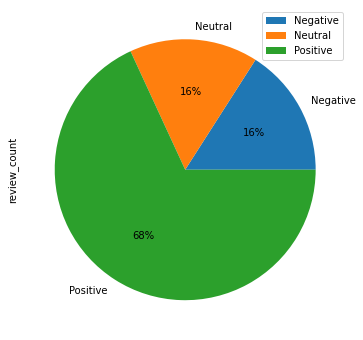

In [184]:
# The Shawshank Redemption sentiment analysis result in Pie Chart
fin_shawshank_counts = pd.DataFrame(fin_shawshank.groupby('Analysis')['review_content'].count()).reset_index()
fin_shawshank_counts = fin_shawshank_counts.rename(columns={'Analysis':'sentiment','review_content':'review_count'})
fin_shawshank_counts.groupby(['sentiment']).sum().plot(kind='pie',y='review_count',autopct= '%1.0f%%',figsize=(6,6)).legend(loc='upper right')


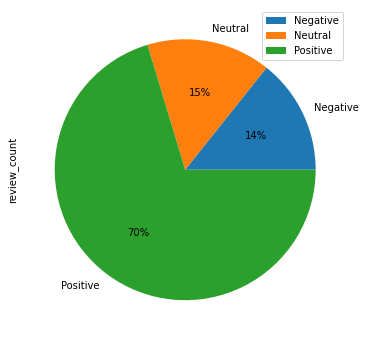

In [186]:
# The Godfather sentiment analysis result in Pie Chart
fin_godfather_counts = pd.DataFrame(fin_godfather.groupby('Analysis')['review_content'].count()).reset_index()
fin_godfather_counts = fin_godfather_counts.rename(columns={'Analysis':'sentiment','review_content':'review_count'})
fin_godfather_counts.groupby(['sentiment']).sum().plot(kind='pie',y='review_count',autopct= '%1.0f%%',figsize=(6,6)).legend(loc='upper right')


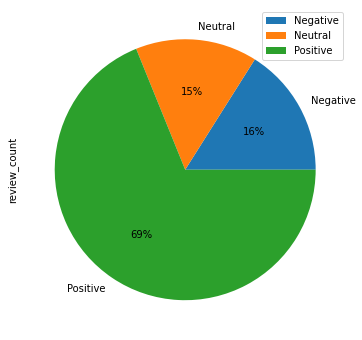

In [183]:
# The Pulp Fiction sentiment analysis result in Pie Chart
fin_pulp_counts = pd.DataFrame(fin_pulp.groupby('Analysis')['review_content'].count()).reset_index()
fin_pulp_counts = fin_pulp_counts.rename(columns={'Analysis':'sentiment','review_content':'review_count'})
fin_pulp_counts.groupby(['sentiment']).sum().plot(kind='pie',y='review_count',autopct= '%1.0f%%',figsize=(6,6)).legend(loc='upper right')


    Sentiment Analysis Results in percentage (%)
                                    Positive    Neutral    Negative
    (1)The Shawshank Redemption     68          16         16
    (2)The Godfather                70          15         14
    (3)Pulp Fiction                 69          15         16

From the sentiment analysis, I realized that The Godfather got the most positive and the least negative reviews whereas The Shawshank Redemption ranked last in the positive reviews. However, the reason why The Shawshank Redemption won the battle in our previous TMDb average rating section is because of its highest neutral comments. The Shawshank Redemption is a story that all of us can interpret, relate to, and appreciate. Hence, most of the comments’ sentiment remained as neutral. Aspects of this movie are not contentious or topics of heated discussions. Most of the audience do not have a problem liking the movie or seeing it on top of the list. Extending this fairly ideal scenario to a larger audience, it is only natural that the most popular one wins. We can draw parallels to this theory in real life too.



### Conclusion

Due to the analysis above, I can conclude that votes (views) and ratings indeed have a direct relationship with a movie's overall ranking. However, the Top Critic did not match the ranking. Thus, rather than placing a film at a specific level, the Top Critic mainly showcased whether a film received lots of debate. Meanwhile, the number of Positive and Negative comments could be much higher than the Neutral ones. A movie with many neutral comments could represent peoples' natural appreciation of a common social, cultural, historical topic or incident. In a nutshell, this analytical model can help American streaming platforms to pick top popular movies and to understand their audiences' positive, neutral, and negative opinions for further commercial marketing and streaming selections.   

However, there is also a shortage of our sentiment analysis. The complete sentiment of a piece of text would not always pinpoint the root cause of an audience’s opinion. In general, movie reviews contain fine-grained sentiment about different aspects of the service that are mentioned in texts. A review about a movie may contain opinionated sentences about its story, cast, direction, etc. Therefore, for future development, we can identify different aspects of a movie, and determine the context of a particular group of sentences in the movie review to help users understand the positive and negative parts of a movie. 



### Reference

#### TMDb Updated movie votes dataset
https://www.kaggle.com/datasets/jillanisofttech/updatedtmdb-movies-dataset

#### Rotten Tomatoes movies and critic reviews dataset
https://www.kaggle.com/datasets/stefanoleone992/rotten-tomatoes-movies-and-critic-reviews-dataset
